# Proyecto 2
## David Henao Molina - Maria Camila Bravo

In [17]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.signal as signal 
from scipy.fftpack import fft
from scipy.signal import detrend
from scipy.fftpack import fft
from numpy.polynomial.polynomial import Polynomial

### Extracción de los datos


In [6]:
ruta_base = os.getcwd()
ruta_base

'/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2'

In [21]:
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"
dataframe = pd.read_excel(ruta)
dataframe

#ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\Diagnostics.xlsx"
#dataframe = pd.read_excel(ruta)
#dataframe

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


Se extrae los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation)

In [22]:
sb = data[data['Rhythm'] == 'SB']
afib = data[data['Rhythm'] == 'AFIB']

#Numero de registros extraído
print(f"Registros de SB Sinus Bradycardia: {len(sb)}")
print(f"Registros de AFIB Atrial Fibrillation: {len(afib)}")


Registros de SB Sinus Bradycardia: 3889
Registros de AFIB Atrial Fibrillation: 1780


#### Creamos el nuevo dataframe que va a contener solo los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation)

In [23]:
df_filtrado= dataframe[(dataframe['Rhythm'] == 'SB') | (dataframe['Rhythm'] == 'AFIB')]
df_filtrado = df_filtrado.reset_index(drop=True)
df_filtrado

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
3,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
4,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,MUSE_20180114_134724_10000,SB,LVHV,56,FEMALE,56,56,88,444,428,49,62,9,219,263,441
5665,MUSE_20180113_122544_20000,SB,NONE,38,FEMALE,56,56,88,434,418,69,54,10,218,262,435
5666,MUSE_20180114_074720_85000,SB,NONE,55,FEMALE,57,57,94,414,402,-4,1,10,212,259,419
5667,MUSE_20180115_131524_93000,AFIB,RBBB TWC,70,MALE,93,82,130,386,479,61,194,15,225,290,418


In [24]:
fs = 500 # frecuencia de muestre mencionada 
t = np.arange(0, df_filtrado.shape[0]/fs,1/fs) 
t.shape

(5669,)

#### Extracción de las señales de ECG de la derivación II

In [25]:
ruta = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/ECGDataDenoised/MUSE_20180111_155115_19000.csv'
datos = pd.read_csv(ruta, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

#datos = pd.read_csv('c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\ECGDataDenoised\\MUSE_20180111_155115_19000.csv',delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

datos_interes = datos['II']
datos


,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-165.33,-358.970,-121.710,270.250,-28.869,-231.16,448.39,636.52,618.45,-7.8987,-315.160,-570.84
1,-150.75,-336.810,-114.980,251.410,-23.883,-217.52,441.74,646.47,642.56,35.3890,-269.510,-532.21
2,-136.69,-315.560,-108.630,233.450,-19.126,-204.36,436.06,656.31,665.95,76.5720,-225.830,-495.39
3,-123.74,-296.230,-103.090,217.230,-14.815,-192.29,432.27,666.14,688.05,113.5100,-186.000,-461.84
4,-112.57,-279.750,-98.611,203.530,-11.213,-181.87,431.08,676.31,708.47,144.3000,-151.680,-432.56
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-190.32,52.396,170.760,74.543,-170.890,107.63,310.73,398.59,538.11,230.9700,87.684,-249.88
4996,-178.98,65.438,171.870,62.325,-165.650,114.41,302.32,398.80,541.18,245.2700,110.940,-226.42
4997,-171.04,74.181,172.080,53.876,-161.490,118.93,297.25,401.02,544.16,254.4800,129.340,-207.20
4998,-165.46,79.570,171.300,48.203,-157.840,121.64,293.97,403.86,546.18,259.5100,144.140,-190.64


In [28]:
folder_path = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/ECGDataDenoised'
#folder_path = r'c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\ECGDataDenoised'

# Diccionario para almacenar los datos de la derivación II por cada paciente
ecg_dict = {}

# Iterar sobre el FileName del dataframe filtrado
for filename in df_filtrado['FileName']:
    file_path = os.path.join(folder_path, filename + '.csv')
    
    if os.path.exists(file_path):
        datos = pd.read_csv(file_path, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        derivacion_II = datos['II'].values # Cargamos solo la derivación II y lo llevamos a arreglos
        ecg_dict[filename] = derivacion_II
    else:
        print(f"El archivo {filename}.csv no se encontró.")
print(ecg_dict)

{'MUSE_20180113_171327_27000': array([381.94 , 381.92 , 380.63 , ...,  13.736,  21.127,  31.464]), 'MUSE_20180112_073319_29000': array([27.367, 21.567, 16.269, ..., 12.501, 11.9  , 11.158]), 'MUSE_20180113_121940_44000': array([118.49 , 117.41 , 115.43 , ...,  11.557,  10.687,  10.046]), 'MUSE_20180112_120347_79000': array([ 5.7255,  7.0583,  8.533 , ..., 19.01  , 30.395 , 42.41  ]), 'MUSE_20180114_075026_69000': array([-26.846 ,  -4.778 ,  14.99  , ..., -29.008 ,  -9.6002,  12.339 ]), 'MUSE_20180114_075128_92000': array([ 2.3965 ,  9.4703 , 15.396  , ..., -4.3145 , -0.84292,  2.7626 ]), 'MUSE_20180118_174026_42000': array([-65.316, -57.138, -49.756, ..., -42.091, -35.226, -25.615]), 'MUSE_20180115_125443_25000': array([ -2.1666 ,  -0.77577,   0.74095, ..., 117.13   , 122.05   ,
       126.66   ]), 'MUSE_20180113_134825_04000': array([ -9.747, -12.598, -14.603, ...,  54.586,  50.783,  47.336]), 'MUSE_20180114_070718_20000': array([ 22.87 ,  15.858,  10.079, ..., -23.374, -21.563, -18.8

#### FORMULAS 

##### 1. Formula: Desviación

##### Detrending

/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_2932/4135582565.py:4: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, signal, degree)  # Ajuste polinómico de grado 'degree'


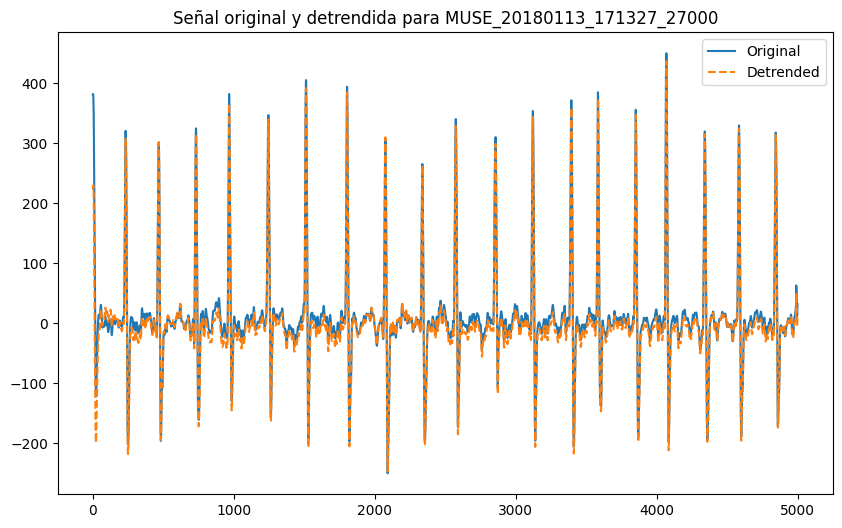

{'MUSE_20180113_171327_27000': array([221.79343272, 226.41370288, 229.67425942, ...,  -3.80396594,
         3.08635094,  12.91541797])}


In [36]:
# Función para aplicar detrending a una señal usando ajuste polinómico:
def detrend_signal(signal, degree=20):
    x = np.arange(len(signal))
    p = np.polyfit(x, signal, degree)  # Ajuste polinómico de grado 'degree'
    trend = np.polyval(p, x)           # Obtener la tendencia usando el polinomio ajustado
    detrended_signal = signal - trend  # Eliminar la tendencia
    return detrended_signal

# Diccionario para almacenar las señales de derivación II sin tendencia
ecg_detrended_dict = {}

# Aplicar detrending a cada señal en el diccionario ecg_dict
for idx, (filename, signal) in enumerate(ecg_dict.items()):
    detrended_signal = detrend_signal(signal)
    ecg_detrended_dict[filename] = detrended_signal
    
    # Graficar solo la primera señal
    if idx == 0:
        plt.figure(figsize=(10, 6))
        plt.plot(signal, label='Original')
        plt.plot(detrended_signal, label='Detrended', linestyle='--')
        plt.title(f'Señal original y detrendida para {filename}')
        plt.legend()
        plt.show()
        break  # Salir del bucle después de graficar la primera

# Verificar el diccionario con las señales detrendizadas
print(ecg_detrended_dict)


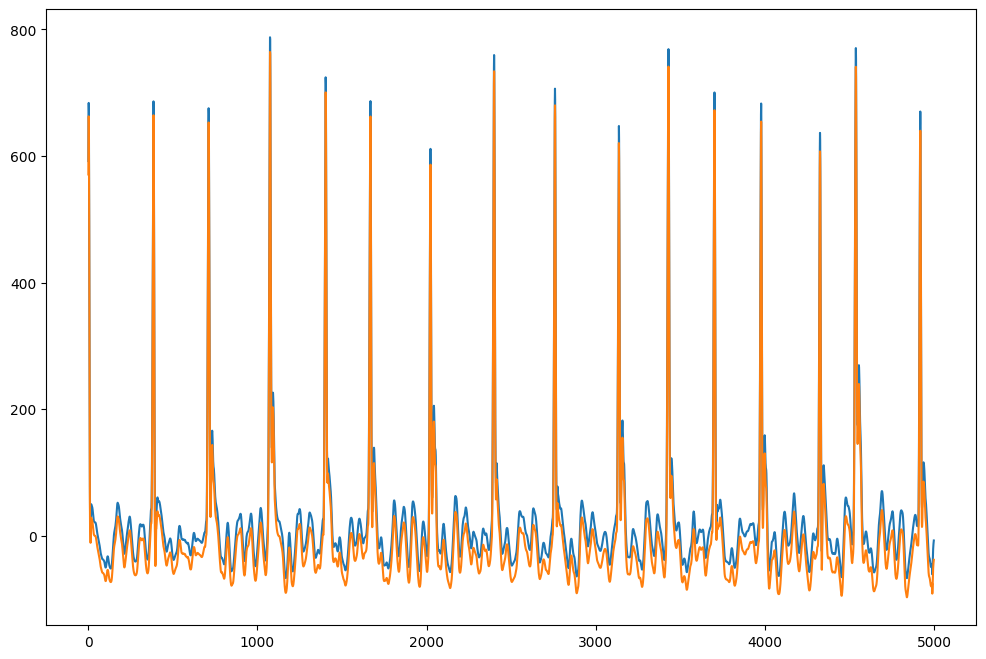

In [29]:
a = ecg_dict['MUSE_20180115_131524_93000']
a2 = detrend(ecg_dict['MUSE_20180115_131524_93000'])
plt.figure(figsize=(12, 8))
plt.plot(a)
plt.plot(a2)

In [272]:
# dtrend, compresion, detrend
# nuevo dataframe filename de df_filtrado, datos II, ptencia y biespectro

##### 2. Formula Compresión 

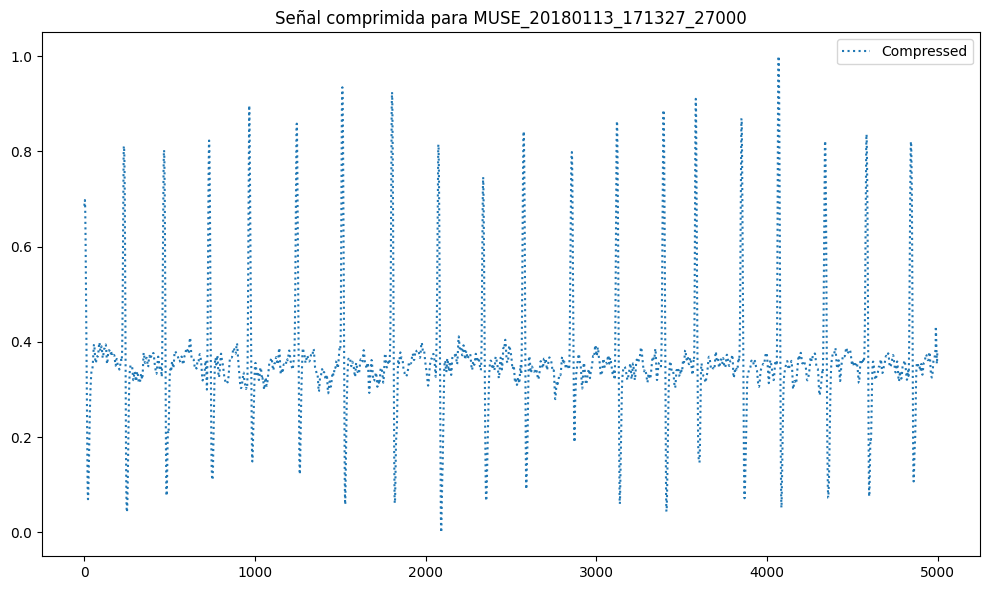

{'MUSE_20180113_171327_27000': array([0.68589162, 0.69264202, 0.69740583, ..., 0.35628448, 0.36635152,
       0.3807122 ])}


In [45]:
# Función para comprimir la señal al rango [0, 1]:
def compress_signal(signal):
    x_min = np.min(signal)
    x_max = np.max(signal)
    compressed_signal = (signal - x_min) / (x_max - x_min)
    return compressed_signal

ecg_compressed_dict = {}

# Aplicar detrending y compresión a cada señal en el diccionario ecg_dict
for idx, (filename, signal) in enumerate(ecg_dict.items()):
    compressed_signal = compress_signal(detrended_signal)
    ecg_compressed_dict[filename] = compressed_signal
    
    # Graficar solo la primera señal original, detrendida y comprimida
    if idx == 0:
        plt.figure(figsize=(10, 6))
        
        # Señal comprimida
        plt.subplot(1, 1, 1)
        plt.plot(compressed_signal, label='Compressed', linestyle=':')
        plt.title(f'Señal comprimida para {filename}')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        break  # Salir del bucle después de graficar la primera

# Verificar el diccionario con las señales comprimidas
print(ecg_compressed_dict)


/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_2932/4135582565.py:4: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, signal, degree)  # Ajuste polinómico de grado 'degree'


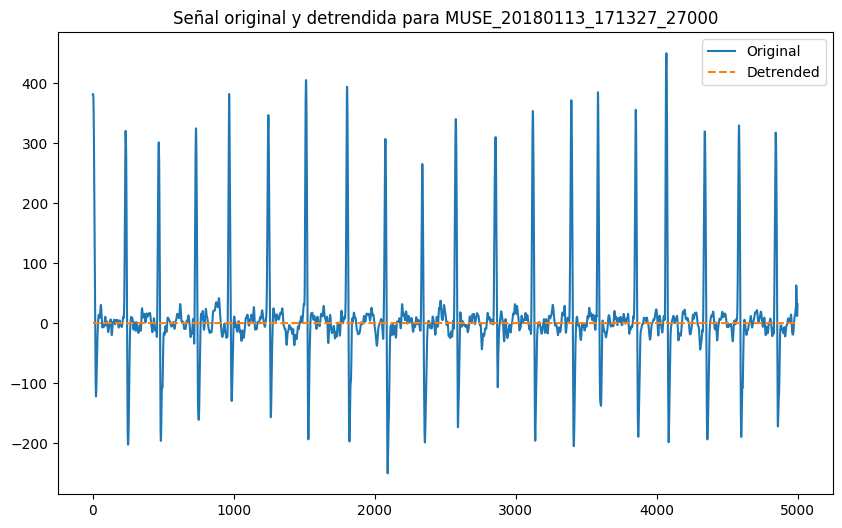

{'MUSE_20180113_171327_27000': array([ 0.32404946,  0.33079987,  0.33556367, ..., -0.00555769,
        0.00450935,  0.01887002])}


In [53]:
# Diccionario para almacenar las señales de derivación II sin tendencia
ecg_detrended_dict2 = {}

# Aplicar detrending a cada señal en el diccionario ecg_dict
for idx, (filename, signal) in enumerate(ecg_dict.items()):
    detrended_signal2 = detrend_signal(compressed_signal)
    ecg_detrended_dict2[filename] = detrended_signal2
    
    # Graficar solo la primera señal
    if idx == 0:
        plt.figure(figsize=(10, 6))
        plt.plot(signal, label='Original')
        plt.plot(detrended_signal2, label='Detrended', linestyle='--')
        plt.title(f'Señal original y detrendida para {filename}')
        plt.legend()
        plt.show()
        break  # Salir del bucle después de graficar la primera

# Verificar el diccionario con las señales detrendizadas
print(ecg_detrended_dict2)

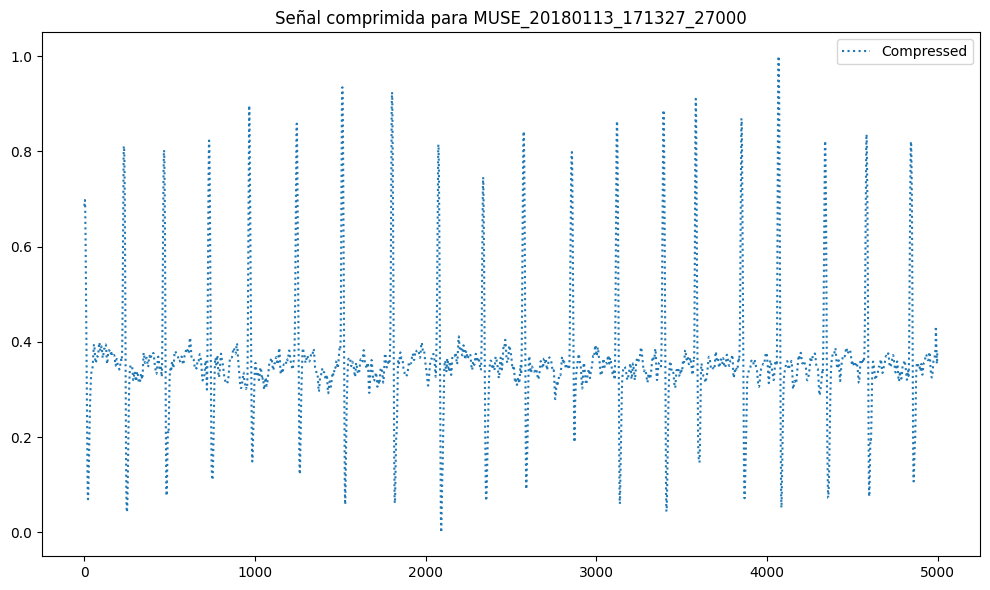

{'MUSE_20180113_171327_27000': array([0.68589174, 0.69264215, 0.69740595, ..., 0.35628457, 0.36635161,
       0.38071228])}


In [55]:
ecg_compressed_dict2 = {}

# Aplicar detrending y compresión a cada señal en el diccionario ecg_dict
for idx, (filename, signal) in enumerate(ecg_dict.items()):
    compressed_signal2 = compress_signal(detrended_signal2)
    ecg_compressed_dict2[filename] = compressed_signal2
    
    # Graficar solo la primera señal original, detrendida y comprimida
    if idx == 0:
        plt.figure(figsize=(10, 6))
        
        # Señal comprimida
        plt.subplot(1, 1, 1)
        plt.plot(compressed_signal2, label='Compressed', linestyle=':')
        plt.title(f'Señal comprimida para {filename}')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        break  # Salir del bucle después de graficar la primera

# Verificar el diccionario con las señales comprimidas
print(ecg_compressed_dict2)

##### 3. Formula Biespectro: Analisis Expectral de Potencia

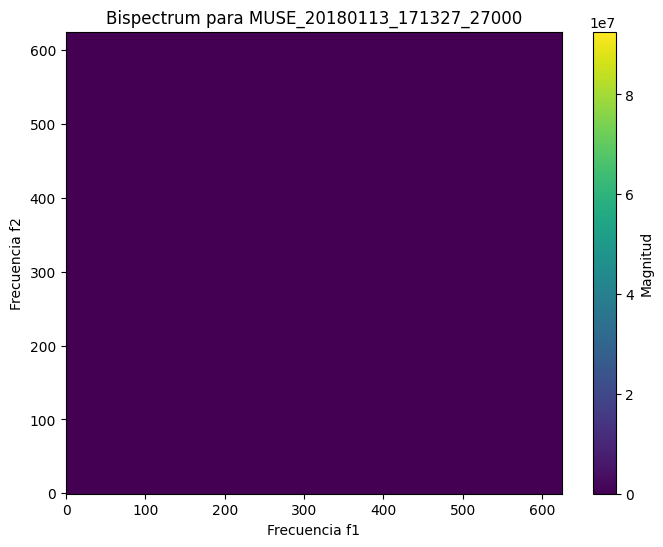

{'MUSE_20180113_171327_27000': array([[9.25643758e+07+0.00000000e+00j, 2.02275540e+04+5.98280823e-13j,
        9.77071585e+04-1.48302240e-13j, ...,
        5.88525681e+04+5.70835446e-13j, 9.77071585e+04+1.48302240e-13j,
        2.02275540e+04-5.98280823e-13j],
       [2.02275540e+04+5.98280823e-13j, 2.28345348e+02+2.26828423e+01j,
        7.93103756e+01-8.49206881e+01j, ...,
        7.93103756e+01-8.49206881e+01j, 2.28345348e+02+2.26828423e+01j,
        0.00000000e+00+0.00000000e+00j],
       [9.77071585e+04-1.48302240e-13j, 7.93103756e+01-8.49206881e+01j,
        1.94588127e+03-5.52529775e+02j, ...,
        7.93103756e+01-8.49206881e+01j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       ...,
       [5.88525681e+04+5.70835446e-13j, 7.93103756e+01-8.49206881e+01j,
        7.93103756e+01-8.49206881e+01j, ...,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [9.77071585e+04+1.48302240e-13

In [56]:
def bispectrum(signal, n_segments=8):
    N = len(signal) // n_segments  # Tamaño de cada segmento
    bispec = np.zeros((N, N), dtype=complex)  # Matriz para almacenar el bispectrum
    
    # Dividir la señal en segmentos y aplicar FFT
    for i in range(n_segments):
        segment = signal[i*N:(i+1)*N]  # Tomar un segmento de la señal
        X = fft(segment)  # Aplicar FFT al segmento
        
        # Calcular el bispectrum
        for f1 in range(N):
            for f2 in range(N):
                if f1 + f2 < N:
                    bispec[f1, f2] += X[f1] * X[f2] * np.conj(X[f1 + f2])
                    
    return bispec

ecg_bispectrum_dict = {}

for idx, (filename, compressed_signal2) in enumerate(ecg_compressed_dict2.items()):
    # Calcular el bispectrum
    bispec = bispectrum(compressed_signal2)
    ecg_bispectrum_dict[filename] = bispec
    
    # Graficar solo el bispectrum de la primera señal
    if idx == 0:
        plt.figure(figsize=(8, 6))
        plt.imshow(np.abs(bispec), cmap='viridis', aspect='auto', origin='lower')
        plt.title(f'Bispectrum para {filename}')
        plt.colorbar(label='Magnitud')
        plt.xlabel('Frecuencia f1')
        plt.ylabel('Frecuencia f2')
        plt.show()
        break  # Salir después de graficar el bispectrum de la primera señal

# Verificar el diccionario con los resultados del bispectrum
print(ecg_bispectrum_dict)



#### Fórmula 4: Cálculo de la bicoherencia

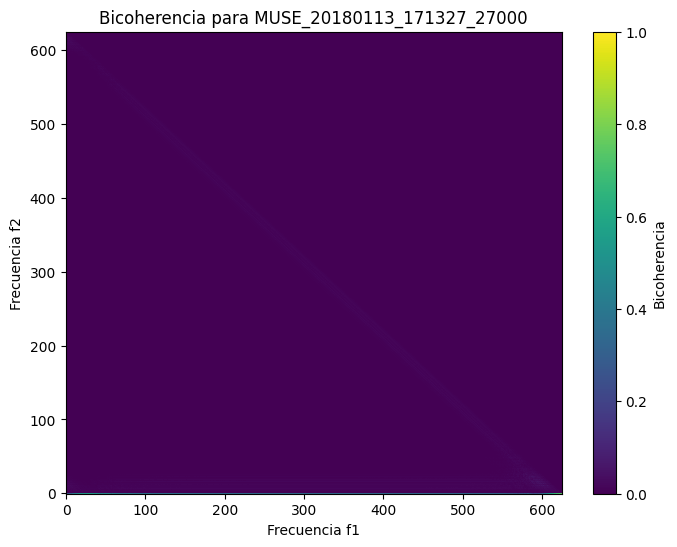

{'MUSE_20180113_171327_27000': array([[9.11826544e-01, 3.38257427e-01, 3.90227720e-01, ...,
        9.96066787e-01, 9.97656960e-01, 1.00000000e+00],
       [1.99256096e-04, 3.83732867e-03, 4.64072710e-04, ...,
        1.96660638e-03, 2.34304019e-03, 0.00000000e+00],
       [9.62486781e-04, 1.94311457e-03, 8.07877918e-03, ...,
        1.96660638e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.79740583e-04, 1.94311457e-03, 4.64072710e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.62486781e-04, 3.83732867e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.99256096e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])}


In [49]:
def bicoherence(bispec):
    numer = np.abs(bispec)
    denom = np.sum(np.abs(bispec), axis=0)
    denom[denom == 0] = 1e-10  # Evitar división por cero
    bicoherence_values = numer / denom
    return bicoherence_values

ecg_bicoherence_dict = {}

for idx, (filename, bispec) in enumerate(ecg_bispectrum_dict.items()):
    # Calcular la bicoherencia
    bicoh = bicoherence(bispec)
    ecg_bicoherence_dict[filename] = bicoh
    
    # Graficar solo el bispectrum de la primera señal
    if idx == 0:
        # Graficar la bicoherencia
        plt.figure(figsize=(8, 6))
        plt.imshow(bicoh, cmap='viridis', aspect='auto', origin='lower')
        plt.title(f'Bicoherencia para {filename}')
        plt.colorbar(label='Bicoherencia')
        plt.xlabel('Frecuencia f1')
        plt.ylabel('Frecuencia f2')
        plt.show()

        break  # Salir después de graficar el bispectrum y la bicoherencia de la primera señal

# Verificar los diccionarios con los resultados del bispectrum y bicoherencia
print(ecg_bicoherence_dict)

